# Importamos librerías y cargamos la base de datos para comenzar a analizar

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/properatti.csv', index_col='Unnamed: 0')

In [3]:
data.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


 Vemos cuantas Filas y Columnas tiene

In [4]:
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [6]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Eliminamos columnas que sabemos que no vamos a utilizar.

In [7]:
data.drop(["image_thumbnail", "properati_url", "expenses", "floor"], axis=1, inplace = True)

### Obtenemos los porcentajes de datos faltantes de cada columna

In [8]:
def freq_na(df, zeros=False):
    miss      = df.isnull().sum(axis=0)
    miss_prop = miss / len(df)
    freq = pd.concat([miss, miss_prop], axis=1)
    freq.columns = ['total', 'proporcion']
    return freq if zeros else freq[freq['total'] > 0].sort_values(by='proporcion',ascending=False)

freq_na(data)

,total,proporcion
rooms,73830,0.609058
price_usd_per_m2,52603,0.433947
lat-lon,51550,0.425260
lat,51550,0.425260
lon,51550,0.425260
surface_total_in_m2,39328,0.324435
price_per_m2,33562,0.276869
currency,20411,0.168380
price,20410,0.168372
price_aprox_local_currency,20410,0.168372


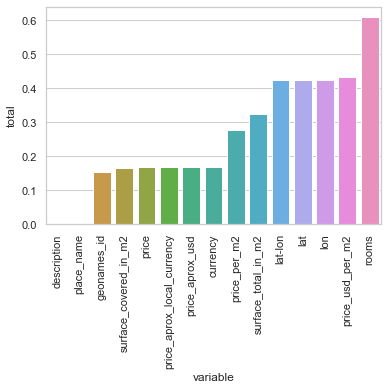

In [9]:
def mostrar_nulos(df):
    
    nulos = df.isnull().sum() / len(df)
    nulos = nulos[nulos > 0]
    nulos.sort_values(inplace=True)
    
    nulos = nulos.to_frame()
    nulos.columns = ['total']
    nulos.index.names = ['variable']
    nulos['variable'] = nulos.index
    # ploteo
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x='variable', y='total', data=nulos)
    plt.xticks(rotation = 90)
    plt.show()
mostrar_nulos(data)

CONCLUSIÓN DE LA OBSERVACIÓN INICIAL:

El DataSet posee algunas columnas con muchos valores faltantes, posibles duplicados o posibles datos no confiables.

Las columnas o datos centrales del análisis que realizaremos son aquellos que nos indiquen:

a) ubicación de las observaciones

b) precio x M2

c) las variables de las cuales dependan las mismas (como ser tipo de propiedad, amenities, garage).

Por lo antes dicho, en este momento sólo nos limitaremos a realizar un drop de las observaciones duplicadas que puedan existir.

##### Evaluando data para ver si hay datos duplicados incluyendo la mayor cantidad de columnas que logicamente deban coincidir.

In [10]:
data_duplicates_mask = data.duplicated(subset=["place_name", "country_name", "description", "title", "lat-lon", "state_name", "price_aprox_usd"], keep="first")
print("registros duplicados en data: ", any(data_duplicates_mask))
print("cantidad de registros duplicados en data: ", data_duplicates_mask.sum())

registros duplicados en data:  True
cantidad de registros duplicados en data:  6496


In [11]:
data= data.drop_duplicates(subset=["place_name", "country_name", "description", "title", "lat-lon", "state_name", "price_aprox_usd"], keep="first")
data.shape

(114724, 21)

### ANÁLISIS DE COLUMNAS DE 0 A 9 - UBICACION DE LAS OBSERVACIONES

##### Columna operation

In [12]:
# Como vemos posee la totalidad de valores sell y sin vacíos, por lo que no agregaría valor. Atacaremos el Drop de columnas más adelante.
operation_group = data.groupby('operation').country_name.count()
operation_group

operation
sell    114724
Name: country_name, dtype: int64

##### Columna property type

In [13]:
# Como vemos posee la totalidad de valores completos y nos será de mucha importancia para analizar los valores por tipo de propiedad.
property_type_group = data.groupby('property_type').property_type.count()
property_type_group

property_type
PH            5532
apartment    65439
house        39705
store         4048
Name: property_type, dtype: int64

Todos los valores estan son "PH", "apartment", "house" y "store". Sin valores nulos.

In [14]:
ciudades = data.groupby('place_name').place_name.count()
ciudades_ordenadas = ciudades.sort_values(ascending=False)
ciudades_ordenadas.head(10)

place_name
Córdoba          8544
Rosario          7142
Mar del Plata    6486
Tigre            3182
Nordelta         3036
Belgrano         2753
Palermo          2669
La Plata         2419
Pilar            2199
Caballito        2160
Name: place_name, dtype: int64

##### Columna place_name

In [15]:
data.place_name.isnull().sum()

23

Contiene 23 valores nulos.

In [16]:
place_name_nulos = data.loc[data.place_name.isnull(), :]
place_name_nulos

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,...,USD,11468925.0,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre
10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,...,USD,9439807.5,535000.0,NaN,300.0,NaN,1783.333333,5.0,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...
11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,-58.626261,...,USD,9704475.0,550000.0,2170.0,270.0,253.456221,2037.037037,NaN,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE
14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,-58.638174,...,USD,8469360.0,480000.0,240.0,200.0,2000.000000,2400.000000,NaN,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre
18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,-58.626350,...,USD,22884916.5,1297000.0,340.0,340.0,3814.705882,3814.705882,NaN,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...
21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,-58.638405,...,USD,7763580.0,440000.0,NaN,220.0,NaN,2000.000000,5.0,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre
23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,-58.641800,...,USD,8469360.0,480000.0,294.0,294.0,1632.653061,1632.653061,NaN,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA
24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,-58.637778,...,USD,9351585.0,530000.0,316.0,270.0,1677.215190,1962.962963,NaN,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre
38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,-58.579659,...,USD,23820075.0,1350000.0,NaN,550.0,NaN,2454.545455,NaN,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta"
45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,-58.637380,...,USD,1676227.5,95000.0,55.0,27.0,1727.272727,3518.518519,1.0,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...


Todos los valores nulos son de Tigre.

In [17]:
data.place_name.fillna('Tigre', inplace = True)

In [18]:
data.place_name.isnull().sum()

0

In [19]:
data.place_name[6489]

'Tigre'

Reemplazo de todos los valores nulos por "Tigre", ya que en place_with_parent_names contiene en todos 'Tigre' 

##### Columna country_name

In [20]:
# Como vemos posee la totalidad de valores Argentina, por lo que no agregaría valor. Atacaremos el Drop de columnas más adelante.
country_name_group = data.groupby('country_name').country_name.count()
country_name_group

country_name
Argentina    114724
Name: country_name, dtype: int64

Todos los valores son "Argentina" y no hay vacios.

##### Columna state_name

In [21]:
state_name_group = data.groupby('state_name').state_name.count()
state_name_group

state_name
Bs.As. G.B.A. Zona Norte        24680
Bs.As. G.B.A. Zona Oeste         9001
Bs.As. G.B.A. Zona Sur          13505
Buenos Aires Costa Atlántica     9908
Buenos Aires Interior            2248
Capital Federal                 30207
Catamarca                          27
Chaco                              57
Chubut                            259
Corrientes                        572
Córdoba                         11304
Entre Ríos                        352
Formosa                            26
Jujuy                              26
La Pampa                          153
La Rioja                            4
Mendoza                           646
Misiones                          401
Neuquén                           569
Río Negro                         789
Salta                             276
San Juan                           40
San Luis                          245
Santa Cruz                         20
Santa Fe                         8783
Santiago Del Estero                 4
T

Ningun valor nulo. Algunas provincias poseen pocas observaciones, cosa que analizaremos más adelante

##### Columna place_with_parent_names

In [22]:
# Analizamos esta columna que como vemos abajo tiene separado por una barra vertical cada ubicación de más general a menos general.
# Parte del país, luego va a la provincia, luego la localidad y el barrio en algunos casos.

place_with_parent_names_group = data.groupby('place_with_parent_names').place_with_parent_names.count()
place_with_parent_names_group.index

Index(['|Argentina|Bs.As. G.B.A. Zona Norte|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| Country Maschwitz Club|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Acacias Blancas|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Altos de Matheu|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Acacias|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Alamo Alto|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Araucarias|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Ceibos|',
       '|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Barrio Cerrado "El Aromo"|',
       ...
       '|Argentina|Tucumán|', '|Argentina|Tucumán|Banda del Río Salí|',
       '|Argentina|Tucumán|Concepción|', '|Argentina|Tucumán|Las Talitas|',
       '|Argentina|Tucumán|Lules|',
       '|Argentina|Tucumán|San Miguel de Tucumán|',
       '|Argentina|Tucumán|Tafí Viejo|', '|Argentina|Tucumán|Taf

In [23]:
print("Contiene", len(place_with_parent_names_group.index),"valores distintos")

Contiene 1164 valores distintos


In [24]:
#Separamos la columna por la barra verical para poder aperturarlo.

placestr=data.place_with_parent_names.str
placeseparado = placestr.split('|', expand=True)
placeseparado

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None
3,,Argentina,Capital Federal,Liniers,,None,None
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,None
...,...,...,...,...,...,...,...
121215,,Argentina,Capital Federal,Belgrano,,None,None
121216,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,,None
121217,,Argentina,Capital Federal,Villa Urquiza,,None,None
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,None


In [25]:
# Renombramos las columnas del nuevo DF para luego comparar. Tener en cuenta que place_name tiene la mínima expresión de la ubicación.

placeseparado.rename(columns={1:'country_name_nuevo', 2:'state_name_nuevo', 3:'place_name_nuevo1', 4:'place_name_nuevo2'},inplace=True)

In [26]:
placeseparado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114724 entries, 0 to 121219
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   0                   114724 non-null  object
 1   country_name_nuevo  114724 non-null  object
 2   state_name_nuevo    114724 non-null  object
 3   place_name_nuevo1   114724 non-null  object
 4   place_name_nuevo2   110438 non-null  object
 5   5                   38987 non-null   object
 6   6                   527 non-null     object
dtypes: object(7)
memory usage: 12.0+ MB


In [27]:
#comparamos si coinciden el país que extrajimos de la columna con country_name. Está ok
controlpaises = data['country_name'] == placeseparado['country_name_nuevo']
controlpaises.value_counts()

True    114724
dtype: int64

In [28]:
#comparamos ahora si coincide la provincia y está ok.
controlprovincias = data['state_name'] == placeseparado['state_name_nuevo']
controlprovincias.value_counts()

True    114724
dtype: int64

In [29]:
# tratamos de analizar ahora place_name.
# vemos que la columna 6 del nuevo DF son vacios asique la podemos eliminar
placeseparado[6][placeseparado[6].notnull()].value_counts()

    527
Name: 6, dtype: int64

In [30]:
# vemos que la columna 5 del nuevo DF la mayoría son vacíos y algunos son Barrios.
a = placeseparado[5][placeseparado[5].notnull()].value_counts()
print(a)

# transformamos en NaN los vacíos
placeseparado[5] = placeseparado[5].apply(lambda x: np.NaN if x=='' else x)
a = placeseparado[5][placeseparado[5].notnull()].value_counts()
print(a)

                             38460
Barrio Los Alisos              262
Barrio La Alameda               62
BarrioPortezuelo                52
Barrio Los Lagos                39
Barrio El Golf                  31
Enyoi                           16
Barrio Los Castores             13
QBay Yacht                      13
Barrio Las Glorietas            10
Barrio La Isla                  10
Islas del Canal                  6
Barrio Los Sauces                4
Barrio Barrancas del Lago        4
Barrio Cabos del Lago            3
Barrio El Yacht                  1
Barrio Los Tilos                 1
Name: 5, dtype: int64
Barrio Los Alisos            262
Barrio La Alameda             62
BarrioPortezuelo              52
Barrio Los Lagos              39
Barrio El Golf                31
Enyoi                         16
QBay Yacht                    13
Barrio Los Castores           13
Barrio La Isla                10
Barrio Las Glorietas          10
Islas del Canal                6
Barrio Los Sauces   

In [31]:
data.place_name.value_counts()

Córdoba                                  8544
Rosario                                  7142
Mar del Plata                            6486
Tigre                                    3205
Nordelta                                 3036
                                         ... 
Cinco Saltos                                1
Country Golf El Sosiego                     1
Nelson                                      1
Rocha                                       1
San Eliseo Country, Golf, Hotel & Spa       1
Name: place_name, Length: 1060, dtype: int64

In [32]:
# De esta columna 5 del nuevo DF se puede ver que son barrios cerrados y coinciden con el data frame original.
b = data.place_name[placeseparado[5].notnull()]
print(b)

c = placeseparado[5][placeseparado[5].notnull()] == b
print(c.value_counts())

# Acá vemos que la totalidad de esos Barrios corresponden a Nordelta, por lo que los sacamos del Data Frame original
# y reemplazamos todos esos valores por Nordelta para poder analizarlos mejor
d = placeseparado['place_name_nuevo2'][placeseparado[5].notnull()]
print(d.value_counts())

data.place_name[placeseparado[5].notnull()] == d
data.place_name.value_counts()

17                   Barrio El Golf
33                   Barrio El Golf
278            Barrio Las Glorietas
416                Barrio Los Lagos
446            Barrio Las Glorietas
                    ...            
117011                   QBay Yacht
118210             Barrio Los Lagos
118841    Barrio Barrancas del Lago
119583    Barrio Barrancas del Lago
120156    Barrio Barrancas del Lago
Name: place_name, Length: 527, dtype: object
True    527
dtype: int64
Nordelta    527
Name: place_name_nuevo2, dtype: int64


Córdoba                                  8544
Rosario                                  7142
Mar del Plata                            6486
Tigre                                    3205
Nordelta                                 3036
                                         ... 
Cinco Saltos                                1
Country Golf El Sosiego                     1
Nelson                                      1
Rocha                                       1
San Eliseo Country, Golf, Hotel & Spa       1
Name: place_name, Length: 1060, dtype: int64

In [33]:
# vemos que la columna 4 que llamamos place_name_nuevo2 del nuevo DF la mayoría son vacíos.
a = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()].value_counts()
print(a)

# transformamos en NaN los vacíos
placeseparado.place_name_nuevo2 = placeseparado.place_name_nuevo2.apply(lambda x: np.NaN if x=='' else x)
a = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()].value_counts()
print(a)

                                      71474
Nordelta                               3563
La Plata                               1696
Olivos                                 1565
Lomas de Zamora                        1208
                                      ...  
Barrio Cerrado "Las Araucarias"           1
William Morris                            1
Colina de Peralta Ramos                   1
Barrio Cerrado El Casco de Alvarez        1
Villa Argüello                            1
Name: place_name_nuevo2, Length: 568, dtype: int64
Nordelta                                     3563
La Plata                                     1696
Olivos                                       1565
Lomas de Zamora                              1208
Ramos Mejía                                  1120
                                             ... 
Villars                                         1
Barrio Cerrado La Masia                         1
The Boating Club                                1
Complejo de Bar

In [34]:
# De esta columna 4 del nuevo DF se puede ver que todo coincide con place_name.
b = data.place_name[placeseparado['place_name_nuevo2'].notnull()]
print(b)

c = placeseparado.place_name_nuevo2[placeseparado['place_name_nuevo2'].notnull()] == b
print(c.value_counts())

d = placeseparado['place_name_nuevo1'][placeseparado['place_name_nuevo2'].notnull()]
print(d.value_counts())

4               Centro
6                Munro
12            Martínez
13        Palermo Soho
14        Palermo Soho
              ...     
121211        Acassuso
121212        Acassuso
121213        Martínez
121216          Beccar
121218     Plaza Colón
Name: place_name, Length: 38964, dtype: object
True     38437
False      527
dtype: int64
Tigre              6240
Vicente López      3348
Lomas de Zamora    3113
La Plata           2508
San Isidro         2301
                   ... 
J A de la Peña        1
Balcarce              1
General Pinto         1
Villarino             1
Ramallo               1
Name: place_name_nuevo1, Length: 80, dtype: int64


CONCLUSIÓN DEL ANALISIS DE LAS COLUMNAS DE UBICACIÓN:

El DataSet posee observaciones repartidas poro todo el país, y antes de sacar una conclusión, vamos a analizar el peso real de la cantidad de observaciones en cada territorio.

Como vemos abajo, son 28 las zonas provinciales (incluye la provincia de Bs As separada)

In [35]:
# Vemos distribución por provincia
distr_x_pcia = data['state_name'].value_counts()
print(distr_x_pcia.count())
distr_x_pcia

28


Capital Federal                 30207
Bs.As. G.B.A. Zona Norte        24680
Bs.As. G.B.A. Zona Sur          13505
Córdoba                         11304
Buenos Aires Costa Atlántica     9908
Bs.As. G.B.A. Zona Oeste         9001
Santa Fe                         8783
Buenos Aires Interior            2248
Río Negro                         789
Mendoza                           646
Tucumán                           591
Corrientes                        572
Neuquén                           569
Misiones                          401
Entre Ríos                        352
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Formosa                            26
Jujuy                              26
Santa Cruz                         20
Santiago Del

Vamos a listar el tamaño en KMS2 de las distintas provincias (o zonas) de las cuales tenemos datos y a calcular la cantidad de operaciones por KM2 que tenemos en cada una

#Capital Federal                 202
#Bs.As. G.B.A. Zona Norte        1427
#Bs.As. G.B.A. Zona Sur          1207
#Córdoba                         165321
#Santa Fe                        133007
#Buenos Aires Costa Atlántica    1280
#Bs.As. G.B.A. Zona Oeste        1046
#Buenos Aires Interior           302611
#Río Negro                       203013
#Neuquén                         94078
#Mendoza                         148827
#Tucumán                         22524
#Corrientes                      88199
#Misiones                        29801
#Entre Ríos                      78781
#Salta                           155488
#Chubut                          224686
#San Luis                        76748
#La Pampa                        143440
#Formosa                         72066
#Chaco                           99633
#San Juan                        89651
#Tierra Del Fuego                21478
#Catamarca                       102602
#Jujuy                           53219
#Santa Cruz                      243943
#Santiago Del Estero             136351
#La Rioja                        89680

In [36]:
tamañokms = pd.Series([202, 1427, 1207, 165321, 133007, 1280, 1046, 302611, 203013, 94078, 148827, 22524, 88199, 29801, 78781, 155488, 224686, 76748, 143440, 72066, 99633, 89651, 21478, 102602, 53219, 243943, 136351, 89680])
print(distr_x_pcia.shape)
print(tamañokms.shape)
print(distr_x_pcia.dtype)
print(tamañokms.dtype)

print("Capital Federal - Operaciones por KM2 -: ", (distr_x_pcia[0]/tamañokms[0]).round(2))
print("Bs.As. G.B.A. Zona Norte - Operaciones por KM2 -: ", (distr_x_pcia[1]/tamañokms[1]).round(2))
print("Bs.As. G.B.A. Zona Sur - Operaciones por KM2 -: ", (distr_x_pcia[2]/tamañokms[2]).round(2))
print("Córdoba - Operaciones por KM2 -: ", (distr_x_pcia[3]/tamañokms[3]).round(2))
print("Santa Fe - Operaciones por KM2 -: ", (distr_x_pcia[4]/tamañokms[4]).round(2))
print("Buenos Aires Costa Atlántica - Operaciones por KM2 -: ", (distr_x_pcia[5]/tamañokms[5]).round(2))
print("Bs.As. G.B.A. Zona Oeste - Operaciones por KM2 -: ", (distr_x_pcia[6]/tamañokms[6]).round(2))
print("Buenos Aires Interior - Operaciones por KM2 -: ", (distr_x_pcia[7]/tamañokms[7]).round(2))
print("Río Negro - Operaciones por KM2 -: ", (distr_x_pcia[8]/tamañokms[8]).round(2))
print("Neuquen - Operaciones por KM2 -: ", (distr_x_pcia[9]/tamañokms[9]).round(2))
print("Mendoza - Operaciones por KM2 -: ", (distr_x_pcia[10]/tamañokms[10]).round(2))
print("Tucuman - Operaciones por KM2 -: ", (distr_x_pcia[11]/tamañokms[11]).round(2))
print("Corrientes - Operaciones por KM2 -: ", (distr_x_pcia[12]/tamañokms[12]).round(2))
print("Misiones - Operaciones por KM2 -: ", (distr_x_pcia[13]/tamañokms[13]).round(2))
print("Entre Ríos - Operaciones por KM2 -: ", (distr_x_pcia[14]/tamañokms[14]).round(2))
print("Salta - Operaciones por KM2 -: ", (distr_x_pcia[15]/tamañokms[15]).round(2))
print("Chubut - Operaciones por KM2 -: ", (distr_x_pcia[16]/tamañokms[16]).round(2))
print("San Luis - Operaciones por KM2 -: ", (distr_x_pcia[17]/tamañokms[17]).round(2))
print("La Pampa - Operaciones por KM2 -: ", (distr_x_pcia[18]/tamañokms[18]).round(2))
print("Formosa - Operaciones por KM2 -: ", (distr_x_pcia[19]/tamañokms[19]).round(2))
print("Chaco - Operaciones por KM2 -: ", (distr_x_pcia[20]/tamañokms[20]).round(2))
print("San Juan - Operaciones por KM2 -: ", (distr_x_pcia[21]/tamañokms[21]).round(2))
print("Tierra del Fuego - Operaciones por KM2 -: ", (distr_x_pcia[22]/tamañokms[22]).round(2))
print("Catamarca - Operaciones por KM2 -: ", (distr_x_pcia[23]/tamañokms[23]).round(2))
print("Jujuy - Operaciones por KM2 -: ", (distr_x_pcia[24]/tamañokms[24]).round(2))
print("Santa Cruz - Operaciones por KM2 -: ", (distr_x_pcia[25]/tamañokms[25]).round(2))
print("Santiago del Estero - Operaciones por KM2 -: ", (distr_x_pcia[26]/tamañokms[26]).round(2))
print("La Rioja - Operaciones por KM2 -: ", (distr_x_pcia[27]/tamañokms[27]).round(2))



(28,)
(28,)
int64
int64
Capital Federal - Operaciones por KM2 -:  149.54
Bs.As. G.B.A. Zona Norte - Operaciones por KM2 -:  17.3
Bs.As. G.B.A. Zona Sur - Operaciones por KM2 -:  11.19
Córdoba - Operaciones por KM2 -:  0.07
Santa Fe - Operaciones por KM2 -:  0.07
Buenos Aires Costa Atlántica - Operaciones por KM2 -:  7.03
Bs.As. G.B.A. Zona Oeste - Operaciones por KM2 -:  8.4
Buenos Aires Interior - Operaciones por KM2 -:  0.01
Río Negro - Operaciones por KM2 -:  0.0
Neuquen - Operaciones por KM2 -:  0.01
Mendoza - Operaciones por KM2 -:  0.0
Tucuman - Operaciones por KM2 -:  0.03
Corrientes - Operaciones por KM2 -:  0.01
Misiones - Operaciones por KM2 -:  0.01
Entre Ríos - Operaciones por KM2 -:  0.0
Salta - Operaciones por KM2 -:  0.0
Chubut - Operaciones por KM2 -:  0.0
San Luis - Operaciones por KM2 -:  0.0
La Pampa - Operaciones por KM2 -:  0.0
Formosa - Operaciones por KM2 -:  0.0
Chaco - Operaciones por KM2 -:  0.0
San Juan - Operaciones por KM2 -:  0.0
Tierra del Fuego - Operaci

In [37]:
# Vemos que dentro de Capital Federal, 1027 valores no tienen definición de Localidad, por lo que estas tendremos que buscarlas por el lado de lat-lon.
# Por otro lado vemos que Palermo está divido por zonas, en esta primera iteración lo dejaremos así.
Control = data.place_name[data['state_name'] == 'Capital Federal']
print(Control.value_counts())
print(Control.shape)
Control.value_counts().head(40)

Belgrano           2753
Palermo            2669
Caballito          2160
Recoleta           1483
Villa Urquiza      1459
                   ... 
Velez Sarsfield      38
Villa Real           37
Villa Soldati        14
Villa Riachuelo       6
Catalinas             4
Name: place_name, Length: 62, dtype: int64
(30207,)


Belgrano                2753
Palermo                 2669
Caballito               2160
Recoleta                1483
Villa Urquiza           1459
Flores                  1275
Villa Crespo            1218
Barrio Norte            1124
San Telmo               1119
Almagro                 1067
Capital Federal         1027
Boedo                    852
Nuñez                    711
Balvanera                647
Puerto Madero            612
San Cristobal            608
Saavedra                 516
Monserrat                514
Palermo Hollywood        461
Floresta                 461
Villa del Parque         447
Villa Devoto             413
Mataderos                412
Barracas                 408
Villa Luro               399
Liniers                  383
Palermo Soho             381
Colegiales               344
Parque Patricios         319
Congreso                 296
Coghlan                  246
Retiro                   245
Palermo Chico            225
Centro / Microcentro     220
Boca          

In [38]:
# Vemos que dentro de GBA Zona Norte, 221 valores no tienen definición de Localidad, por lo que al no ser significativas las eliminaremos.
Control = data.place_name[data['state_name'] == 'Bs.As. G.B.A. Zona Norte']
print(Control.value_counts())
print(Control.shape)
Control.value_counts().head(40)

Tigre                            3205
Nordelta                         3036
Pilar                            2196
Olivos                           1565
Martínez                         1017
                                 ... 
Barrio Cerrado San Andres           1
Barrio Cerrado "La Escondida"       1
La Agustina                         1
Barrio San Marco                    1
La Arboleda de Maschwitz            1
Name: place_name, Length: 264, dtype: int64
(24680,)


Tigre                           3205
Nordelta                        3036
Pilar                           2196
Olivos                          1565
Martínez                        1017
Escobar                         1009
San Isidro                       958
San Miguel                       742
Vicente López                    670
San Fernando                     634
Florida                          612
Benavidez                        597
Villa Ballester                  584
Beccar                           393
General San Martín               381
Victoria                         337
La Lucila                        321
San Martín                       295
Bella Vista                      268
Barrio Los Alisos                262
Acassuso                         239
Muñiz                            234
Bs.As. G.B.A. Zona Norte         221
Belén de Escobar                 194
Rincón de Milberg                190
Boulogne Sur Mer                 173
Del Viso                         173
M

CONCLUSIÓN DEL ANALISIS DE LAS COLUMNAS DE UBICACIÓN: Si bien es correcto que en el Interior existe mucho terreno con poca densidad poblacional y podríamos analizar ciudades puntuales como Santa Fe, Rosario o Córdoba, en esta primera iteración vamos a limitar el análisis a las 2 zonas con mayor cantidad de operaciones por KM2 --> Capital Federal y GBA Zona Norte.

In [39]:
place_split = data.place_with_parent_names.str.split('|', expand=True).rename({1:'pais', 2:'provincia', 3:'localidad', 4:'barrio'}, axis=1).drop([0,5,6], axis=1)
place_split['geonames_id'] = data['geonames_id']
place_split

,pais,provincia,localidad,barrio,geonames_id
0,Argentina,Capital Federal,Mataderos,,3430787.0
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,3432039.0
2,Argentina,Capital Federal,Mataderos,,3430787.0
3,Argentina,Capital Federal,Liniers,,3431333.0
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,3435548.0
...,...,...,...,...,...
121215,Argentina,Capital Federal,Belgrano,,3436077.0
121216,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,3436080.0
121217,Argentina,Capital Federal,Villa Urquiza,,3433775.0
121218,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,NaN


In [40]:
localidades = place_split.groupby('localidad').localidad.count().sort_values(ascending=False)
localidades.head(20)

localidad
Tigre                 8512
Mar del Plata         7633
Rosario               7142
Córdoba               6108
                      4286
Palermo               3776
Vicente López         3575
Lomas de Zamora       3386
La Plata              3231
Pilar                 3204
San Isidro            2927
Belgrano              2753
Morón                 2445
La Matanza            2332
Caballito             2160
Lanús                 1782
Escobar               1773
Ituzaingó             1751
Almirante Brown       1601
General San Martín    1577
Name: localidad, dtype: int64

In [41]:
place_split['localidad'] = place_split['localidad'].apply(lambda x: np.NaN if x=='' else x)

In [42]:
mascara_sin_localidad = place_split.localidad.isnull()
mascara_sin_localidad.sum()

4286

In [43]:
mascara_sin_localidad = place_split.localidad.isnull()
geonames_id_sin_localidad = place_split[mascara_sin_localidad].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
geonames_id_sin_localidad

geonames_id
3860255.0    2436
3433955.0    1027
3435907.0     442
3844419.0     129
3430657.0      44
3836276.0      31
3838231.0      21
3837029.0      19
3861244.0      17
3843122.0      10
3838830.0       8
3837152.0       7
3834450.0       6
3849574.0       3
3835868.0       3
3862286.0       3
3435214.0       2
3848949.0       1
3861887.0       1
3853404.0       1
Name: geonames_id, dtype: int64

In [44]:
repeticiones_geonames_id_sin_localidad = place_split[place_split.geonames_id == 3433955.0].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
repeticiones_geonames_id_sin_localidad

geonames_id
3433955.0    1027
Name: geonames_id, dtype: int64

In [45]:
repeticiones_geonames_id_sin_localidad = place_split[place_split.geonames_id == 3435907.0].groupby('geonames_id').geonames_id.count().sort_values(ascending=False)
repeticiones_geonames_id_sin_localidad

geonames_id
3435907.0    442
Name: geonames_id, dtype: int64

Podemos ver que los dos geonames_id que nos faltan en ningun registro tienen imputado la localidad.

In [46]:
mascara_capital = place_split.provincia == 'Capital Federal'

In [47]:
mascara_bs_as_nor = place_split.provincia == 'Bs.As. G.B.A. Zona Norte'

In [48]:
lat_lon_sin_localidad_capital = data[mascara_sin_localidad].groupby('lat-lon').lat.count().sort_values(ascending=False)
lat_lon_sin_localidad_capital

lat-lon
-38.416097,-63.616672            77
-31.4269482,-64.1869816          26
-31.4703619,-64.1684118          23
-34.6088806617,-58.439839714     18
-34.6014466451,-58.3782083649    16
                                 ..
-34.5878923495,-58.5046980237     1
-34.584666,-58.434269             1
-34.5839138,-58.5714856           1
-34.5837695096,-58.373169095      1
-24.6759237,-65.048222            1
Name: lat, Length: 728, dtype: int64

In [49]:
print("Hay", lat_lon_sin_localidad_capital.sum(), "operaciones en Capital Federal sin localidad que tienen imputado lat-lon. Se repiten asi que no son datos muy fiables")

Hay 1067 operaciones en Capital Federal sin localidad que tienen imputado lat-lon. Se repiten asi que no son datos muy fiables


In [50]:
lat_lon_sin_localidad_bs_as_nor = data[mascara_sin_localidad&mascara_bs_as_nor].groupby('lat').lat.count().sort_values(ascending=False)
lat_lon_sin_localidad_bs_as_nor

lat
-34.533220    2
-34.468998    1
-34.484539    1
Name: lat, dtype: int64

In [51]:
print("Hay", lat_lon_sin_localidad_bs_as_nor.sum(), "operaciones en Bs.As. G.B.A. Zona Norte sin localidad que tienen imputado lat-lon.")

Hay 4 operaciones en Bs.As. G.B.A. Zona Norte sin localidad que tienen imputado lat-lon.


### ANÁLISIS DE COLUMNAS DE 10 A 17 - PRECIO POR METRO CUADRADO

#### ANÁLISIS DE PRECIOS

In [52]:
# Vamos a analizar puntualmente la columna price
# Vemos que es de tipo flotante y posee en principio los valores a los que se realizó cada operación. 
data['price']

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: price, Length: 114724, dtype: float64

In [53]:
# Si vemos la columna siguiente (tipo Str), posee la moneda en la que se realizó la operación.
data['currency']

0         USD
1         USD
2         USD
3         USD
4         USD
         ... 
121215    USD
121216    USD
121217    USD
121218    USD
121219    USD
Name: currency, Length: 114724, dtype: object

In [54]:
# Vemos que de los 54887 valores, 3180 son nulos para la columna de price
data.price.isnull().sum()

16615

In [55]:
# Vemos también que 3180 son nulos para la columna de currency
data.currency.isnull().sum()

16616

In [56]:
# Vamos a asegurarnos que los no nulos coincidan entre las columnas
price_nulo_bool = data.price.isnull()
currency_nulo_bool = data.currency.isnull()
precio_sin_currency = price_nulo_bool == currency_nulo_bool
precio_sin_currency.value_counts()

True     114723
False         1
dtype: int64

In [57]:
# En el DF original había valores 0 en la columna Price, por lo que vamos a corroborar que ahora no exista ninguno.

precios0 = data['price'] == 0
precios0.value_counts()

False    114723
True          1
Name: price, dtype: int64

In [58]:
#Ahora vamos a ver las otras columnas si también coinciden
data.price_aprox_local_currency.isnull().sum()

16615

In [59]:
data.price_aprox_usd.isnull().sum()

16615

In [60]:
# nos aseguramos que los valores de estas 3 columnas coincidan en los nulos
price_nulo1_bool = data.price_aprox_local_currency.isnull()
price_nulo2_bool = data.price_aprox_usd.isnull()
price_nulo_bool = data.price.isnull()
precio_control1 = price_nulo1_bool == price_nulo2_bool
precio_control2 = price_nulo1_bool == price_nulo_bool
a = precio_control1.value_counts()
print(a)
b = precio_control2.value_counts()
print(b)

True    114724
dtype: int64
True    114724
dtype: int64


In [61]:
# Vemos que en la columna currency, actualmente hay 3 tipos de monedas, por lo que analizaremos 1 por 1 (el UYU fue eliminado por zonas, pero el tipo de cambio también era lógico).
data['currency'].value_counts()

USD    85583
ARS    12522
PEN        2
UYU        1
Name: currency, dtype: int64

In [62]:
#Vemos los valores de moneda PEN (Sol Peruano)
CurrencyPEN = data.loc[:, "currency"] == "PEN"
dfCurrencyPEN = data.loc[CurrencyPEN]
dfCurrencyPEN.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
50387,Capital Federal,Argentina,Capital Federal,380000.0,PEN,2066864.90,117139.33
50388,Capital Federal,Argentina,Capital Federal,950000.0,PEN,5167162.35,292848.33


In [63]:
# Ok, es logico el tipo de cambio del PEN por lo que lo dejamos así
print(117139/380000)
print(292848/950000)

0.3082605263157895
0.30826105263157894


In [64]:
#Vemos los valores de moneda ARS (Peso Argentino)
CurrencyARS = data.loc[:, "currency"] == "ARS"
dfCurrencyARS = data.loc[CurrencyARS]
dfCurrencyARS.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
9,Rosario,Argentina,Santa Fe,460000.0,ARS,455201.45,25798.49
32,Córdoba,Argentina,Córdoba,550000.0,ARS,544262.59,30846.02
37,Malagueño,Argentina,Córdoba,1250000.0,ARS,1236960.43,70104.59
78,Posadas,Argentina,Misiones,5500000.0,ARS,5442626.35,308460.22
97,San Telmo,Argentina,Capital Federal,1423800.0,ARS,1408947.37,79851.93
...,...,...,...,...,...,...,...
121194,Córdoba,Argentina,Córdoba,1487000.0,ARS,1471488.13,83396.42
121198,Córdoba,Argentina,Córdoba,1492000.0,ARS,1476436.00,83676.84
121199,Córdoba,Argentina,Córdoba,1502000.0,ARS,1486331.74,84237.68
121200,Córdoba,Argentina,Córdoba,1498000.0,ARS,1482373.37,84013.34


In [65]:
# Vemos que entre Price y price_aprox_local_currency no son exactamente los mismos porque seguramente la de local toma un promedio
# del tipo de cambio, pero al menos la división entre una y otra columna debería tender a 1
controlpricears = dfCurrencyARS.price / dfCurrencyARS.price_aprox_local_currency
may = controlpricears > 1.05
men = controlpricears < 0.95
print(may.value_counts())
men.value_counts()
# Vemos que la diferencia en todos los casos está entre 5% mayor o menor, asique estaría ok

False    12522
dtype: int64


False    12522
dtype: int64

In [66]:
#Ahora revisaremos el Tipo de Cambio Usd/Ars
controltipodecambio = dfCurrencyARS.price / dfCurrencyARS.price_aprox_usd
print(controltipodecambio.max())
print(controltipodecambio.min())
tipo_cambio_ars_promedio = controltipodecambio.mean()
tipo_cambio_ars_promedio
# No tenemos las fechas de las operaciones, pero la información se corresponde con tipos de cambio del año 2017 lo que es posible
# Por otro lado no existen tipos de cambio fuera de lo común, son todos lógicos.

17.83053112459975
17.143000001190487


17.81490059934061

In [67]:
#Vemos los valores de moneda USD (Dolar Americano)
CurrencyUSD = data.loc[:, "currency"] == "USD"
dfCurrencyUSD = data.loc[CurrencyUSD]
dfCurrencyUSD.loc[:, ['place_name','country_name', 'state_name', 'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd']]

,place_name,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd
0,Mataderos,Argentina,Capital Federal,62000.0,USD,1093959.00,62000.0
1,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.00,150000.0
2,Mataderos,Argentina,Capital Federal,72000.0,USD,1270404.00,72000.0
3,Liniers,Argentina,Capital Federal,95000.0,USD,1676227.50,95000.0
4,Centro,Argentina,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.0
...,...,...,...,...,...,...,...
121215,Belgrano,Argentina,Capital Federal,870000.0,USD,15350715.00,870000.0
121216,Beccar,Argentina,Bs.As. G.B.A. Zona Norte,498000.0,USD,8786961.00,498000.0
121217,Villa Urquiza,Argentina,Capital Federal,131500.0,USD,2320251.75,131500.0
121218,Plaza Colón,Argentina,Buenos Aires Costa Atlántica,95900.0,USD,1692107.55,95900.0


In [68]:
# Debería coincidir la columna Price con price_aprox_usd asique vamos a controlarlo
controlvaloresenusd = dfCurrencyUSD.price - dfCurrencyUSD.price_aprox_usd
controlvaloresenusd.value_counts()
# Vemos que todos coinciden asique perfecto.

0.0    85583
dtype: int64

CONCLUSIÓN INICIAL PRECIOS: Consideramos que los valores incluidos en las columnas analizadas son lógicos y sólidos para ahora avanzar con la búsqueda de datos faltantes u Outliers.

Búsqueda de valores faltantes:

In [69]:
# recordemos que esta columna tiene 54887 datos de los cuales 3180 datos son NaN (5,79%)
is_null_result = data.price_aprox_usd.isnull()
is_notnull_result = data.price_aprox_usd.notnull()
totaldata=data.price_aprox_usd.shape[0]
print(totaldata)
cant_notnull = is_notnull_result.sum()
print(cant_notnull)
cant_nulls = is_null_result.sum()
print(cant_nulls)
print(cant_nulls/totaldata*100)

114724
98109
16615
14.482584289250724


In [70]:
# de una observación visual podemos ver que en la columna "Title" podemos sacar valores de publicacion que si bien pueden ser distintos
# al valor de la operación final, no deberían distar demasiado de esta

#para los valores dolares entre 1000 y 999999
import re
pattern_dol = "(D *)(?P<Dolares1>[1-9]\d\d*).(?P<Dolares2>\d\d\d)"
pattern_dol_regex =  re.compile(pattern_dol)

resultado_dol = data.title.apply(lambda x: pattern_dol_regex.search(x))
dol_match1 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares1"))
dol_match2 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares2"))
dol_match = dol_match1 + dol_match2

dol_match_fill = dol_match.fillna(0)
dol_match_fill_numeric = dol_match_fill.astype(float)

dol_match_fill_numeric.value_counts()

0.0         112507
120000.0        73
110000.0        60
85000.0         54
130000.0        54
             ...  
179900.0         1
46000.0          1
620000.0         1
359000.0         1
334000.0         1
Name: title, Length: 312, dtype: int64

In [71]:
#para los valores dolares entre mayores a 999999
import re
pattern_dol = "(D *)(?P<Dolares1>[1-9]\d*).(?P<Dolares2>\d\d\d).(?P<Dolares3>\d\d\d)"
pattern_dol_regex =  re.compile(pattern_dol)

resultado_dol = data.title.apply(lambda x: pattern_dol_regex.search(x))
dol_match1 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares1"))
dol_match2 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares2"))
dol_match3 = resultado_dol.apply(lambda x: x if x is None else x.group("Dolares3"))
dol_match = dol_match1 + dol_match2 + dol_match3

dol_match_fill = dol_match.fillna(0)
dol_match_fill_numericmillon = dol_match_fill.astype(float)

dol_match_fill_numericmillon.value_counts()

0.0            114703
1200000.0           2
1100000.0           2
1800000.0           2
1300000.0           2
1000000.0           2
11800000.0          1
3600000.0           1
1234567.0           1
1690000.0           1
1150000.0           1
123456789.0         1
1910000.0           1
1380000.0           1
1900000.0           1
1500000.0           1
2900000.0           1
Name: title, dtype: int64

In [72]:
#para los valores pesos mayores a 999999 y luego lo pasamos a Dolares según el promedio del T/C
import re
pattern_pes = "[$] (?P<Pesos1>[1-9]\d*).(?P<Pesos2>\d\d\d).(?P<Pesos3>\d\d\d)"
pattern_pes_regex =  re.compile(pattern_pes)

resultado_pes = data.title.apply(lambda x: pattern_pes_regex.search(x))
pes_match1 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos1"))
pes_match2 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos2"))
pes_match3 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos3"))
pes_match = pes_match1 + pes_match2 + pes_match3

pes_match_fill = pes_match.fillna(0)
pes_match_fill_numericmillon = pes_match_fill.astype(float)

pes_match_fill_numericmillonDOLAR = pes_match_fill_numericmillon / tipo_cambio_ars_promedio
pes_match_fill_numericmillonDOLAR.value_counts()

0.000000         114473
89812.457335         11
72972.621584          8
95425.735918          6
84199.178751          6
                  ...  
232737.756626         1
132198.941379         1
68078.403988          1
177211.204879         1
76340.588734          1
Name: title, Length: 166, dtype: int64

In [73]:
#para los valores pesos menosres a 999999 y luego lo pasamos a Dolares según el promedio del T/C
import re
pattern_pes = "[$] (?P<Pesos1>[1-9]\d\d\d*).(?P<Pesos2>\d\d\d)"
pattern_pes_regex =  re.compile(pattern_pes)

resultado_pes = data.title.apply(lambda x: pattern_pes_regex.search(x))
pes_match1 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos1"))
pes_match2 = resultado_pes.apply(lambda x: x if x is None else x.group("Pesos2"))
pes_match = pes_match1 + pes_match2

pes_match_fill = pes_match.fillna(0)
pes_match_fill_numericmenosmillon = pes_match_fill.astype(float)

pes_match_fill_numericmenosmillonDOLAR = pes_match_fill_numericmenosmillon / tipo_cambio_ars_promedio
pes_match_fill_numericmenosmillonDOLAR.value_counts()

0.000000        114586
50519.507251         7
42099.589376         7
47712.867959         5
53326.146542         5
                 ...  
7072.731015          1
8880.375117          1
38394.825511         1
52778.009889         1
19534.209470         1
Name: title, Length: 90, dtype: int64

In [74]:
#Ahora en la variable "dol_match_fill_numeric" están los dolares menores a 999.999 Usd
#Ahora en la variable "dol_match_fill_numericmillon" están los dolares mayores a 999.999 Usd
#Ahora en la variable "pes_match_fill_numericmillonDOLAR" están expresados en Usd los pesos mayores a 999.999 $
#Ahora en la variable "pes_match_fill_numericmenosmillonDOLAR" están expresados en Usd los pesos menores a 999.999 $

In [75]:
data.price_aprox_usd.isnull().sum()

16615

In [76]:
# Vamos a cambiar en la columna Precio todos los NaN por los valores de dol_match_fill_numeric, tener en cuenta que quedan 0 NaN y les
# pone 0.
data.price_aprox_usd.fillna(value=dol_match_fill_numeric, inplace=True)

In [77]:
a = data.price_aprox_usd.isnull().sum()

data.price_aprox_usd.value_counts()

0.00          14512
120000.00      1720
130000.00      1486
150000.00      1420
110000.00      1377
              ...  
1183000.00        1
123090.00         1
69257.73          1
102021.48         1
54846.58          1
Name: price_aprox_usd, Length: 10382, dtype: int64

In [78]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [79]:
data.price_aprox_usd.fillna(value=dol_match_fill_numericmillon, inplace=True)
data.price_aprox_usd.value_counts()

0.00          14495
120000.00      1720
130000.00      1486
150000.00      1420
110000.00      1377
              ...  
1183000.00        1
123090.00         1
69257.73          1
102021.48         1
354200.00         1
Name: price_aprox_usd, Length: 10383, dtype: int64

In [80]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [81]:
data.price_aprox_usd.fillna(value=pes_match_fill_numericmillonDOLAR, inplace=True)
data.price_aprox_usd.value_counts()

0.00          14395
120000.00      1720
130000.00      1486
150000.00      1420
110000.00      1377
              ...  
1183000.00        1
123090.00         1
69257.73          1
102021.48         1
87421.44          1
Name: price_aprox_usd, Length: 10433, dtype: int64

In [82]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [83]:
data.price_aprox_usd.fillna(value=pes_match_fill_numericmenosmillonDOLAR, inplace=True)
data.price_aprox_usd.value_counts()

0.00          14322
120000.00      1720
130000.00      1486
150000.00      1420
110000.00      1377
              ...  
426800.00         1
1183000.00        1
123090.00         1
69257.73          1
54128.54          1
Name: price_aprox_usd, Length: 10473, dtype: int64

In [84]:
data.price_aprox_usd = data.price_aprox_usd.apply(lambda x: np.NaN if x==0 else x)

In [85]:
data.price_aprox_usd.isnull().sum()

14322

Con la búsqueda de valores en Title, pasamos de 3180 valores nulos a 2478.

#### ANÁLISIS DE METROS 2

In [86]:
print('Cantidad surface_total_in_m2 null en df inicial:', data["surface_total_in_m2"].isnull().sum())
print('Cantidad surface_covered_in_m2 null en df inicial:', data["surface_covered_in_m2"].isnull().sum())


Cantidad surface_total_in_m2 null en df inicial: 38204
Cantidad surface_covered_in_m2 null en df inicial: 18527


In [87]:
data_m2 = data[['surface_total_in_m2','surface_covered_in_m2']]
data_m2.head()

,surface_total_in_m2,surface_covered_in_m2
0,55.0,40.0
1,NaN,NaN
2,55.0,55.0
3,NaN,NaN
4,35.0,35.0


In [88]:
#A todos los nulos de Metros_Totales les asignamos el valor de Metros_Cubiertos
mask_Totales = data_m2.surface_total_in_m2.isnull()
mask_Cubiertos = data_m2.surface_covered_in_m2.isnull()
mask_TC = np.logical_and( mask_Totales , mask_Cubiertos)

mask_reemp = data_m2.loc[mask_Totales,'surface_covered_in_m2']
data.loc[mask_Totales,'surface_total_in_m2'] = mask_reemp
data.surface_total_in_m2[mask_Totales]

1           NaN
3           NaN
9           NaN
11          NaN
65          NaN
          ...  
121150     52.0
121151     72.0
121155    130.0
121207    178.0
121210    120.0
Name: surface_total_in_m2, Length: 38204, dtype: float64

In [89]:
data.surface_total_in_m2.isnull().value_counts(dropna = False)

False    102758
True      11966
Name: surface_total_in_m2, dtype: int64

In [90]:
data.surface_total_in_m2.isnull().sum()

11966

In [91]:
#A todos los nulos de Metros_cubiertos les asignamos el valor de Metros_totales
mask_reemp2 = data_m2.loc[mask_Cubiertos,'surface_total_in_m2']
data.loc[mask_Cubiertos,'surface_covered_in_m2'] = mask_reemp2
data.surface_total_in_m2[mask_Cubiertos]

1            NaN
3            NaN
5           53.0
9            NaN
10        1514.0
           ...  
121194      50.0
121198      50.0
121199      52.0
121200      50.0
121202      52.0
Name: surface_total_in_m2, Length: 18527, dtype: float64

In [92]:
print('Cantidad surface_total_in_m2 null en df inicial:', data["surface_total_in_m2"].isnull().sum())
print('Cantidad surface_covered_in_m2 null en df inicial:', data["surface_covered_in_m2"].isnull().sum())

Cantidad surface_total_in_m2 null en df inicial: 11966
Cantidad surface_covered_in_m2 null en df inicial: 11966


<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

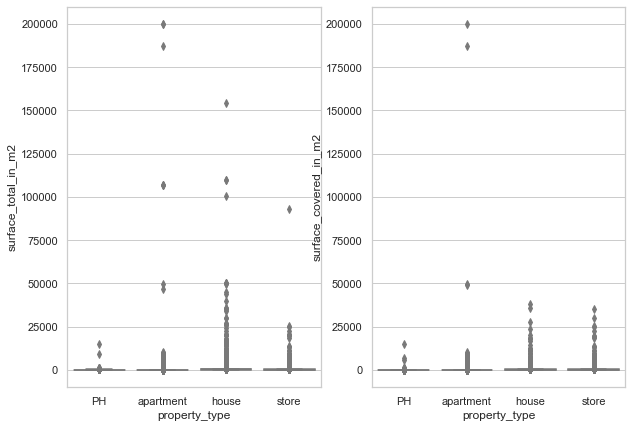

In [93]:
fig, axs = plt.subplots(ncols=2, figsize=(10,7))

sns.boxplot(x = "property_type", y = "surface_total_in_m2", data=data,
               palette=["lightblue", "lightpink"], ax=axs[0])

sns.boxplot(x = "property_type", y = "surface_covered_in_m2", data=data,
               palette=["lightblue", "lightpink"], ax=axs[1])

In [94]:
data.shape

(114724, 21)

In [95]:
#saco outliers de superficie TOTAL mayor a 10.000m2 y menor a 10m2
data = data[data['surface_total_in_m2'] < 10000]



In [96]:
data = data[data['surface_total_in_m2'] > 10]
data.shape

(101971, 21)

In [97]:
#saco outliers de superficie CUBIERTA a 10.000m2 y menor a 10m2
data = data[data['surface_covered_in_m2'] < 10000]

In [98]:
data = data[data['surface_covered_in_m2'] > 10]
data.shape

(101830, 21)

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

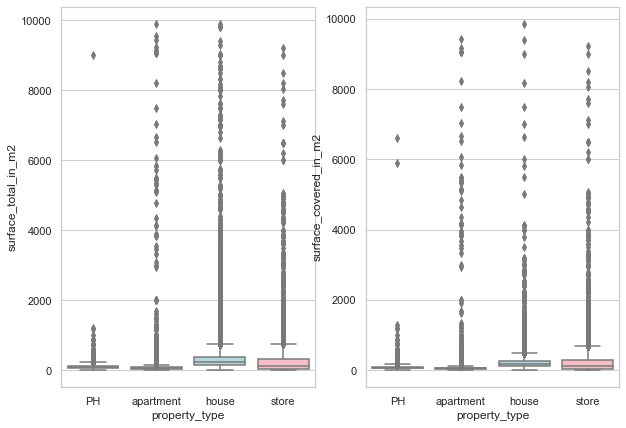

In [99]:
#volvemos a graficar para ver el resultado
fig, axs = plt.subplots(ncols=2, figsize=(10,7))

sns.boxplot(x = "property_type", y = "surface_total_in_m2", data=data,
               palette=["lightblue", "lightpink"], ax=axs[0])

sns.boxplot(x = "property_type", y = "surface_covered_in_m2", data=data,
               palette=["lightblue", "lightpink"], ax=axs[1])

#### CREAMOS COLUMNA DE USD/M2

In [100]:
# Creamos columna con los datos de Usd/M2 según SUPERFICIE CUBIERTA
data["USDxM2C"] = data["price_aprox_usd"]/data["surface_covered_in_m2"]
data.shape

(101830, 22)

In [101]:
# Creamos columna con los datos de Usd/M2 según SUPERFICIE TOTAL
data["USDxM2T"] = data["price_aprox_usd"]/data["surface_total_in_m2"]
data.shape

(101830, 23)

In [102]:
data['USDxM2'] = data['USDxM2C']
data.shape

(101830, 24)

In [103]:
print('Cantidad total datos USDxM2:', data["USDxM2"].shape[0])
print('Cantidad nulos datos USDxM2:', data["USDxM2"].isnull().sum())

Cantidad total datos USDxM2: 101830
Cantidad nulos datos USDxM2: 9709


In [104]:
# Ahora procedemos a eliminar todas las filas donde no tenemos Usd/m2 ya que es un dato clave que no vemos conveniente inferir.
print(data.shape)
data = data.dropna(subset=['USDxM2'], axis = 0) 
print(data.shape)

(101830, 24)
(92121, 24)


In [105]:
data.describe ()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,USDxM2C,USDxM2T,USDxM2
count,7.621700e+04,54824.000000,54824.000000,8.996700e+04,8.996700e+04,9.212100e+04,92121.000000,92121.000000,66288.000000,8.487100e+04,38830.000000,92121.000000,92121.000000,92121.000000
mean,3.548367e+06,-34.729303,-59.002804,4.522937e+05,4.318867e+06,2.436370e+05,180.345307,127.665017,2150.185593,6.057387e+03,2.986531,2487.999432,2230.179704,2487.999432
std,3.719148e+05,1.729844,1.944578,8.901174e+05,5.767976e+06,3.243313e+05,358.706560,225.002648,2751.173422,1.823441e+04,1.719283,3405.701147,3200.937918,3405.701147
min,3.427208e+06,-54.819736,-71.665143,5.000000e+03,8.234017e+04,4.666620e+03,11.000000,11.000000,8.062025,1.116865e+01,1.000000,3.204781,3.204781,3.204781
25%,3.429979e+06,-34.655474,-58.668478,1.100000e+05,1.626661e+06,9.200000e+04,50.000000,45.000000,1203.736231,1.535308e+03,2.000000,1400.000000,1200.000000,1400.000000
50%,3.433357e+06,-34.598316,-58.469229,1.882500e+05,2.646675e+06,1.500000e+05,83.000000,75.000000,1800.000000,2.196970e+03,3.000000,1944.444444,1777.777778,1944.444444
75%,3.436109e+06,-34.491257,-58.396087,4.100000e+05,4.869149e+06,2.750000e+05,191.000000,150.000000,2483.333333,3.311018e+03,4.000000,2696.969697,2449.438202,2696.969697
max,6.948895e+06,-23.137164,-54.556127,1.000000e+08,2.470230e+08,1.400000e+07,9900.000000,9849.000000,206333.333333,4.000000e+06,32.000000,233333.333333,224334.704800,233333.333333


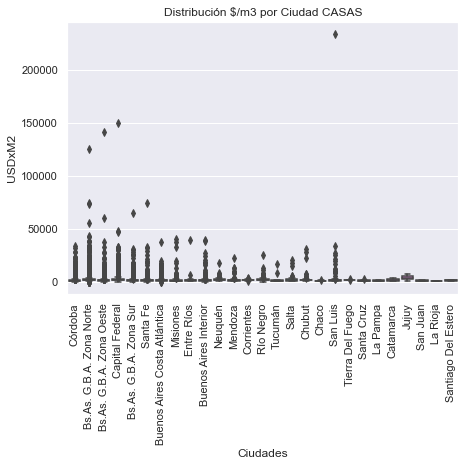

In [106]:
# Vemos la existencia de Outliers
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)
sns.boxplot(data=data.state_name[data.property_type=='house'], x=data.state_name[data.property_type=='house'], y=data.USDxM2)

plt.xlabel("Ciudades"); plt.ylabel("USDxM2");plt.title("Distribución $/m3 por Ciudad CASAS")
plt.show()

In [107]:
#saco outliers de precio por m2
data = data[data['USDxM2'] < 10000]

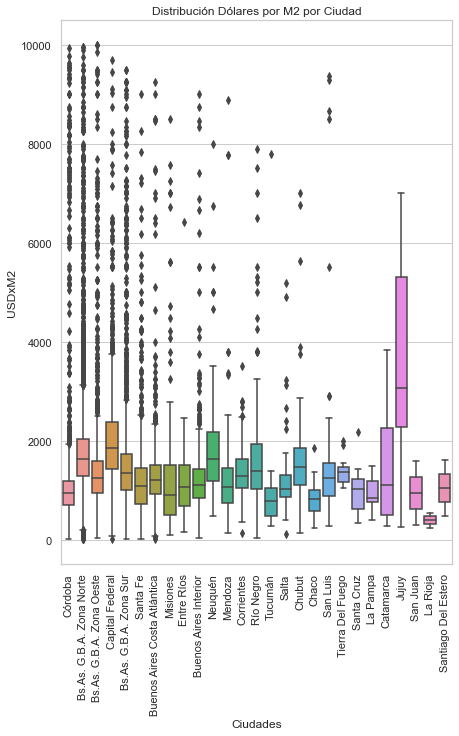

In [108]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 10))
plt.xticks(rotation=90)

sns.boxplot(data=data.state_name[data.property_type=='house'], x=data.state_name[data.property_type=='house'], y=data.USDxM2)
plt.xlabel("Ciudades"); plt.ylabel("USDxM2");plt.title("Distribución Dólares por M2 por Ciudad")
plt.show()

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90502 entries, 0 to 121219
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   90502 non-null  object 
 1   property_type               90502 non-null  object 
 2   place_name                  90502 non-null  object 
 3   place_with_parent_names     90502 non-null  object 
 4   country_name                90502 non-null  object 
 5   state_name                  90502 non-null  object 
 6   geonames_id                 74726 non-null  float64
 7   lat-lon                     53844 non-null  object 
 8   lat                         53844 non-null  float64
 9   lon                         53844 non-null  float64
 10  price                       88351 non-null  float64
 11  currency                    88351 non-null  object 
 12  price_aprox_local_currency  88351 non-null  float64
 13  price_aprox_usd             90

In [110]:
#HACER TODO ESTE ANALISIS PERO CON TODO ARGENTINA
#data_agrupado = data.groupby(['property_type', 'state_name'])
#data_agrupado.describe()['USDxM2'].round(2)

In [111]:
data_agrupado = data.groupby(['property_type', 'country_name'])
data_agrupado.describe()['USDxM2'].round(2)

,,count,mean,std,min,25%,50%,75%,max
property_type,country_name,,,,,,,,
PH,Argentina,4576.0,1846.15,1090.97,15.13,1208.33,1617.33,2187.50,9950.00
apartment,Argentina,52837.0,2510.95,1116.83,3.20,1785.71,2302.63,3000.00,9938.57
house,Argentina,30331.0,1548.92,958.95,8.06,1030.65,1400.00,1825.25,9995.00
store,Argentina,2758.0,2212.06,1703.13,8.31,1015.47,1714.29,2820.51,9950.00


In [112]:
# DEBIDO A QUE ESTAMOS FILTRANDO DESDE STATE NAME EN VEZ DE DESDE LA LOCALIDAD, ACA ELEGIMOS DEL 25%, CUANTAS MUESTRAS MENORES VAMOS A TOMAR Y DEL 75% CUANTAS MUESTRAS MAYORES
MEN = 0.5
MAY = 1.5


In [113]:
Argentina_PH = data.USDxM2[(data.property_type=='PH')]
Arg_PH_min = Argentina_PH > (1208.33 * MEN)
Arg_PH_max = Argentina_PH < (2187.50 * MAY)
Arg_PH_fin = Arg_PH_min & Arg_PH_max
print(Arg_PH_fin.value_counts())
Arg_PH_finT = Arg_PH_fin[Arg_PH_fin==1]
Arg_PH_finT.value_counts()

True     4240
False     336
Name: USDxM2, dtype: int64


True    4240
Name: USDxM2, dtype: int64

In [114]:
Argentina_casa = data.USDxM2[(data.property_type=='house')]
Arg_casa_min = Argentina_casa > (1030.65 * MEN)
Arg_casa_max = Argentina_casa < (1825.25 * MAY)
Arg_casa_fin = Arg_casa_min & Arg_casa_max
print(Arg_casa_fin.value_counts())
Arg_casa_finT = Arg_casa_fin[Arg_casa_fin==1]
Arg_casa_finT.value_counts()

True     27194
False     3137
Name: USDxM2, dtype: int64


True    27194
Name: USDxM2, dtype: int64

In [115]:
Argentina_dt = data.USDxM2[(data.property_type=='apartment')]
Arg_dt_min = Argentina_dt > (1785.71 * MEN)
Arg_dt_max = Argentina_dt < (3000.00 * MAY)
Arg_dt_fin = Arg_dt_min & Arg_dt_max
print(Arg_dt_fin.value_counts())
Arg_dt_finT = Arg_dt_fin[Arg_dt_fin==1]
Arg_dt_finT.value_counts()

True     48999
False     3838
Name: USDxM2, dtype: int64


True    48999
Name: USDxM2, dtype: int64

In [116]:
Argentina_st = data.USDxM2[(data.property_type=='store')]
Arg_st_min = Argentina_st > (1015.47 * MEN)
Arg_st_max = Argentina_st < (2820.51 * MAY)
Arg_st_fin = Arg_st_min & Arg_st_max
print(Arg_st_fin.value_counts())
Arg_st_finT = Arg_st_fin[Arg_st_fin==1]
Arg_st_finT.value_counts()

True     2276
False     482
Name: USDxM2, dtype: int64


True    2276
Name: USDxM2, dtype: int64

In [117]:
parametro = data.USDxM2[(Arg_PH_finT.index) | (Arg_casa_finT.index) | (Arg_dt_finT.index) | (Arg_st_finT.index)]
parametro

0         1550.000000
2         1309.090909
4         1828.571429
6         1666.666667
7         3450.000000
             ...     
121202    1625.348077
121216    1383.333333
121217    3371.794872
121218    1997.916667
121219    1675.324675
Name: USDxM2, Length: 82709, dtype: float64

In [118]:
cf = data.loc[parametro.index]
data = cf

In [119]:
data.shape

(82709, 24)

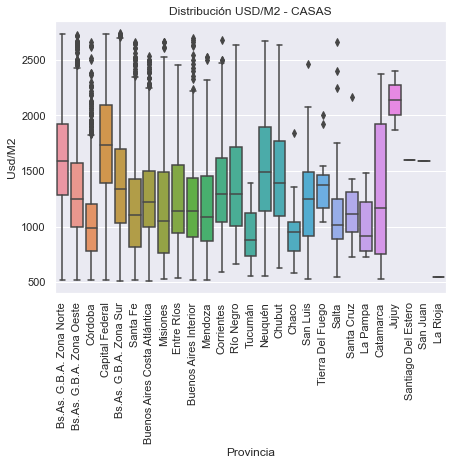

In [120]:
# Vemos como queda luego de la eliminación de los Outliers
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)
sns.boxplot(data=data.state_name[data.property_type=='house'], x=data.state_name[data.property_type=='house'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución USD/M2 - CASAS")
plt.show()

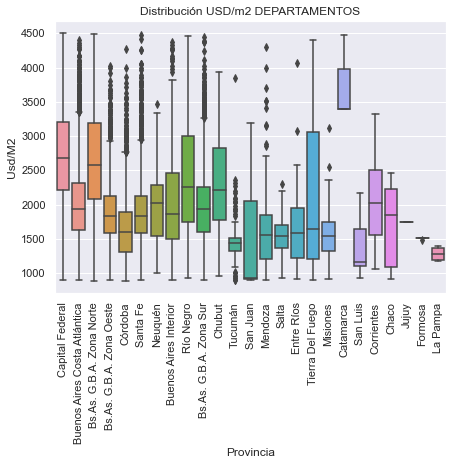

In [121]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)
sns.boxplot(data=data.state_name[data.property_type=='apartment'], x=data.state_name[data.property_type=='apartment'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución USD/m2 DEPARTAMENTOS")
plt.show()

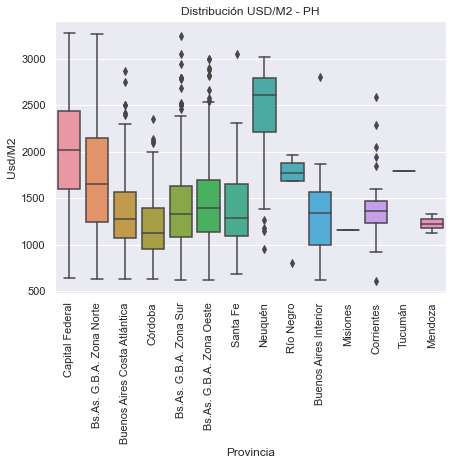

In [122]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)
sns.boxplot(data=data.state_name[data.property_type=='PH'], x=data.state_name[data.property_type=='PH'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución USD/M2 - PH")
plt.show()

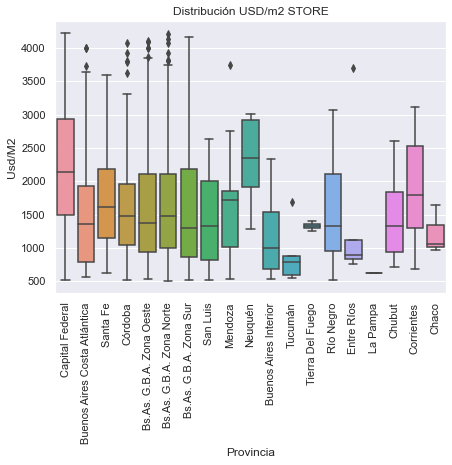

In [123]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.xticks(rotation=90)
sns.boxplot(data=data.state_name[data.property_type=='store'], x=data.state_name[data.property_type=='store'], y=data.USDxM2)

plt.xlabel("Provincia"); plt.ylabel("Usd/M2");plt.title("Distribución USD/m2 STORE")
plt.show()

In [124]:
data.pivot_table(index='state_name', columns='property_type', aggfunc={'USDxM2':'mean', 'price_aprox_usd':'count'})

USDxM2                            \
property_type                          PH    apartment        house   
state_name                                                            
Bs.As. G.B.A. Zona Norte      1713.966399  2629.562947  1607.094730   
Bs.As. G.B.A. Zona Oeste      1444.047879  1881.104274  1303.765778   
Bs.As. G.B.A. Zona Sur        1395.360192  1963.906449  1394.011460   
Buenos Aires Costa Atlántica  1325.485132  2026.591561  1260.742425   
Buenos Aires Interior         1334.574268  2032.951043  1198.242683   
Capital Federal               2022.772193  2723.979912  1742.370443   
Catamarca                             NaN  3679.920324  1337.869583   
Chaco                                 NaN  1696.262705   971.749785   
Chubut                                NaN  2296.093798  1472.287079   
Corrientes                    1377.723699  2055.405461  1349.803154   
Córdoba                       1196.293851  1645.330980  1021.968988   
Entre Ríos                            NaN  1712.734065  1257.762765   
Formosa                               NaN  1507.801886          NaN   
Jujuy                                 NaN  1752.614792  2138.043071   
La Pampa                              NaN  1287.022340  1008.373971   
La Rioja                              NaN          NaN   544.444444   
Mendoza                       1226.216814  1616.614941  1190.744745   
Misiones                      1154.663824  1553.622402  1206.128943   
Neuquén                       2392.643197  1960.286890  1515.181830   
Río Negro                     1646.503177  2409.898104  1400.167715   
Salta                                 NaN  1544.971419  1176.193497   
San Juan                              NaN  1672.282057  1589.037500   
San Luis                              NaN  1376.055177  1241.467240   
Santa Cruz                            NaN          NaN  1200.171103   
Santa Fe                      1424.971145  1894.946647  1184.803960   
Santiago Del Estero                   NaN          NaN  1600.000000   
Tierra Del Fuego                      NaN  2051.745236  1383.761104   
Tucumán                       1791.561806  1501.270170   939.046378   

                                          price_aprox_usd                     \
property_type                       store              PH apartment    house   
state_name                                                                     
Bs.As. G.B.A. Zona Norte      1650.476635           845.0    8631.0  11026.0   
Bs.As. G.B.A. Zona Oeste      1643.453334           602.0    2670.0   3467.0   
Bs.As. G.B.A. Zona Sur        1607.425500           571.0    3850.0   4561.0   
Buenos Aires Costa Atlántica  1517.334793           440.0    5163.0   1859.0   
Buenos Aires Interior         1133.025990            32.0     551.0    722.0   
Capital Federal               2214.688303          1492.0   20220.0   1450.0   
Catamarca                             NaN             NaN       9.0      6.0   
Chaco                         1220.982511             NaN       7.0     16.0   
Chubut                        1456.343590             NaN      18.0     86.0   
Corrientes                    1896.367490            51.0     118.0    242.0   
Córdoba                       1616.385524           114.0    3378.0   2332.0   
Entre Ríos                    1462.853073             NaN      33.0     43.0   
Formosa                               NaN             NaN       4.0      NaN   
Jujuy                                 NaN             NaN       1.0      2.0   
La Pampa                       616.920440             NaN       4.0     10.0   
La Rioja                              NaN             NaN       NaN      1.0   
Mendoza                       1650.804440             2.0     195.0    155.0   
Misiones                              NaN             1.0      68.0    107.0   
Neuquén                       2313.161376            50.0     104.0     75.0   
Río Negro                     1528.407141             6.0     118.0    10

### Análisis de Amenities

##### Búsqueda de Garage en description

In [125]:
garage_pattern = "(?P<garage>cochera|garage|estacionamiento)"
garage_regex =  re.compile(garage_pattern)

garage_match = data.description.apply(lambda x: x if x is np.NaN else garage_regex.search(x))
garage_match_mask = garage_match.notnull()
data.loc[garage_match_mask, "Garage"] = 1
data["Garage"].fillna(0,inplace=True)
data.loc[:,"Garage"] = data.loc[:,"Garage"].astype(int)

##### Búsqueda de propiedades "A estrenar" en description

In [126]:
estrenar_pattern = "(?P<estrenar>(a estrenar)|(departamento nuevo))"
estrenar_regex =  re.compile(estrenar_pattern)

estrenar_match = data.description.apply(lambda x: x if x is np.NaN else estrenar_regex.search(x))
estrenar_match_mask = estrenar_match.notnull()
data.loc[estrenar_match_mask, "Estrenar"] = 1
data["Estrenar"].fillna(0, inplace=True)
data.loc[:,"Estrenar"] = data.loc[:,"Estrenar"].astype(int)

##### Búsqueda de Pileta en description

In [127]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina)"
pileta_regex =  re.compile(pileta_pattern)

pileta_match = data.description.apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_match_mask = pileta_match.notnull()
data.loc[pileta_match_mask, "Pileta"] = 1
data["Pileta"].fillna(0, inplace=True)
data.loc[:,"Pileta"] = data.loc[:,"Pileta"].astype(int)

##### Búsqueda de Balcón en description

In [128]:
balcon_pattern = "(?P<balcon>balcon|balcones|balcón)"
balcon_regex =  re.compile(balcon_pattern)

balcon_match = data.description.apply(lambda x: x if x is np.NaN else balcon_regex.search(x))
balcon_match_mask = balcon_match.notnull()
data.loc[balcon_match_mask, "Balcon"] = 1
data["Balcon"].fillna(0, inplace=True)
data.loc[:,"Balcon"] = data.loc[:,"Balcon"].astype(int)

##### Búsqueda de Gimnasio en description

In [129]:
gym_pattern = "(?P<gym>gym|gimnasio|gimnacio)"
gym_regex =  re.compile(gym_pattern)

gym_match = data.description.apply(lambda x: x if x is np.NaN else gym_regex.search(x))
gym_match_mask = gym_match.notnull()
data.loc[gym_match_mask, "Gimnasio"] = 1
data["Gimnasio"].fillna(0, inplace=True)
data.loc[:,"Gimnasio"] = data.loc[:,"Gimnasio"].astype(int)

##### Búsqueda de Quincho en description

In [130]:
quincho_pattern = "(?P<quincho>quincho|kincho|qincho|(\ssum\s))"
quincho_regex =  re.compile(quincho_pattern)

quincho_match = data.description.apply(lambda x: x if x is np.NaN else quincho_regex.search(x))
quincho_match_mask = quincho_match.notnull()
data.loc[quincho_match_mask, "Quincho"] = 1
data["Quincho"].fillna(0, inplace=True)
data.loc[:,"Quincho"] = data.loc[:,"Quincho"].astype(int)

##### Búsqueda de Quincho en description

In [131]:
parrilla_pattern = "parrilla|parrila|orno de barro|barbecue|asador"
parrilla_regex =  re.compile(parrilla_pattern)

parrilla_match = data.description.apply(lambda x: x if x is np.NaN else parrilla_regex.search(x))
parrilla_match_mask = parrilla_match.notnull()
data.loc[parrilla_match_mask, "Parrilla"] = 1
data["Parrilla"].fillna(0, inplace=True)
data.loc[:,"Parrilla"] = data.loc[:,"Parrilla"].astype(int)

##### Búsqueda de Patio en description

In [132]:
patio_pattern = "patio|jardin|jardín|con parque|parque con|lindo parque|parque compartido|parque arbolado"
patio_regex =  re.compile(patio_pattern)

patio_match = data.description.apply(lambda x: x if x is np.NaN else patio_regex.search(x))
patio_match_mask = patio_match.notnull()
data.loc[patio_match_mask, "Patio"] = 1
data["Patio"].fillna(0, inplace=True)
data.loc[:,"Patio"] = data.loc[:,"Patio"].astype(int)

##### Búsqueda de Lavadero en description

In [133]:
lavadero_pattern = "(?P<lavadero>lavadero|labadero|laundry)"
lavadero_regex =  re.compile(lavadero_pattern)

lavadero_match = data.description.apply(lambda x: x if x is np.NaN else lavadero_regex.search(x))
lavadero_match_mask = lavadero_match.notnull()
data.loc[lavadero_match_mask, "Lavadero"] = 1
data["Lavadero"].fillna(0, inplace=True)
data.loc[:,"Lavadero"] = data.loc[:,"Lavadero"].astype(int)

Tanto Garage como Estrenar van a ser dos columnas separadas

La forma es imputación es a traves de variables dummies. Es decir, para cada amenitie agregamos una columna con el nombre de la misma y la completamos con 1 si el anuncio la indica y 0 en caso contrario.

In [134]:
print("Total de \"{0}\" imputados: {1}".format("Quincho", data["Quincho"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Gimnasio", data["Gimnasio"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Balcon", data["Balcon"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Pileta", data["Pileta"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Garage", data["Garage"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Estrenar", data["Estrenar"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Parrilla", data["Parrilla"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Patio", data["Patio"].sum()))
print("Total de \"{0}\" imputados: {1}".format("Lavadero", data["Lavadero"].sum()))
data['Amenities'] = data['Pileta'] + data['Quincho'] + data['Balcon'] + data['Gimnasio'] + data["Parrilla"] + data["Patio"] + data["Lavadero"]

Total de "Quincho" imputados: 5403
Total de "Gimnasio" imputados: 3199
Total de "Balcon" imputados: 21442
Total de "Pileta" imputados: 13680
Total de "Garage" imputados: 19047
Total de "Estrenar" imputados: 4351
Total de "Parrilla" imputados: 20329
Total de "Patio" imputados: 16883
Total de "Lavadero" imputados: 19004


 1ER CONCLUSION LAS COLUMNAS DE PRICE POR M2 NO SE CONSIDERARAN PORQUE SE GENERARON A PARTIR DE DATOS DE SUPERFICIE Y PRECIO YA LIMPIOS Y ANALIZADOS
 
 3ER CONCLUSION LA COLUMNA ROOMS ES IMPORTANTE PORQUE DA VALOR AL DATASET, SE LLENARÀN LOS NULOS EN LA COLUMNA ROOMS.

#### Busqueda de Ambientes en title y description

In [135]:
rooms_pattern = "\s(?P<ambientes>\d\d?)(\s?)(?P<sufijo>AMB|amb|Amb)"
rooms_regex =  re.compile(rooms_pattern)

rooms_match = data.description.apply(lambda x: x if x is np.NaN else rooms_regex.search(x))
rooms_match_mask = rooms_match.notnull()
data.loc[rooms_match_mask, "Ambientes"] = rooms_match[rooms_match_mask].apply(lambda x: x.group("ambientes"))

In [136]:
data["Ambientes"] = data["Ambientes"].astype(float)
data.loc[(pd.isnull(data["rooms"])),"rooms"] = data["Ambientes"]
print('Cantidad rooms null en data inicial:', data["rooms"].isnull().sum())

Cantidad rooms null en data inicial: 34883


Con el fin de buscar nulos por tipo de propiedad para ver cuanto peso tiene cada nulo por categorìa, generamos una mascara por columna analizada en esta seccion

In [137]:
data['suptotnulo']= data.surface_total_in_m2.isnull()
data['supcubnulo']= data.surface_covered_in_m2.isnull()
data['ambnulo']= data.rooms.isnull()

In [138]:
#aca hago una tabla con nulos discriminado por tipo de propiedad
data.groupby(['property_type']).aggregate({'suptotnulo': 'sum', 'supcubnulo': 'sum', 'ambnulo': 'sum'})

,suptotnulo,supcubnulo,ambnulo
property_type,,,
PH,0,0,1120
apartment,0,0,15355
house,0,0,16288
store,0,0,2120


ANALISIS A: SUPERFICIE EN RELACION A LOS AMBIENTES


La idea es ver que por ejemplo los 2 ambientes tienen un rango de m2 y los 3 ambientes tambien se encuentran en cierto rango de m2, vamos a ver esa relacion 
graficando la relacion que hay entre cantidad de ambientes y superficie

<AxesSubplot:xlabel='Ambientes', ylabel='surface_covered_in_m2'>

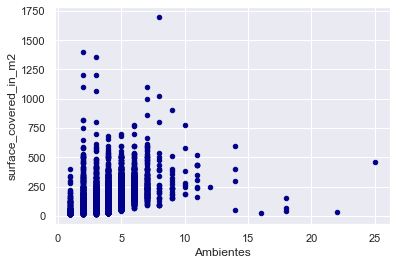

In [139]:
data.plot.scatter(x='Ambientes',y='surface_covered_in_m2', c='DarkBlue')

Conclusion: se pueden sacar outliers de propiedades de mas de 2000 m2 y propiedades de mas de 15 ambientes

In [140]:
#superficie mayor a 10.000m2
data = data[data['surface_covered_in_m2'] < 2000]
data.shape

(82648, 38)

In [141]:
#hago una mascara para graficar valores de menos de 11 ambientes
data = data[data['Ambientes'].fillna(0) <11]
data.shape

(82627, 38)

CONCLUSION, SE ELIMINAN DEL DATASET OUTLIERS DE INDICES DE MAS DE 15 AMBIENTES Y SUPERFICIES MAYORES A 2000M2

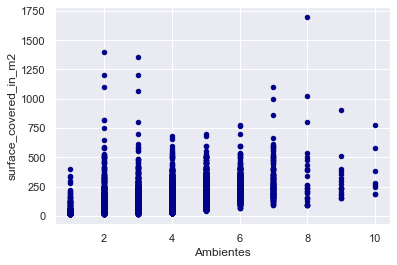

In [142]:
ax2 = data.plot.scatter(x='Ambientes', y='surface_covered_in_m2', c='DarkBlue')

In [143]:
data.drop(["suptotnulo", "suptotnulo", "supcubnulo", "ambnulo"], axis=1, inplace = True)

In [144]:
data.Ambientes.value_counts()

2.0     9418
3.0     9191
4.0     5113
1.0     1634
5.0     1379
6.0      410
7.0      159
8.0       29
9.0       18
10.0       8
Name: Ambientes, dtype: int64

## CONCLUSIÓN: se genera un nuevo dataset final, el cual se va a exportar para el próximo análisis

Primero se eliminan las columnas que no se van a utilizar, se dejan las nuevas columnas que se generaron luego del análisis del dataset original

In [145]:
data.drop(["operation", "country_name", 'place_with_parent_names',"geonames_id",'currency',
           'price','price_aprox_local_currency','price_usd_per_m2',
           'price_per_m2','rooms','USDxM2C', 'USDxM2T'], axis=1, inplace = True)

Luego se renombran las columnas, para generar el dataset final

In [146]:
data.rename(columns={'property_type':'Tipo_Propiedad','place_name':'Barrio','state_name':'Región','price_aprox_usd':'Precio','description':'Descripción','title':'Título','m2_calculated':'Metros_cuadrados','USDxM2':'Precio_por_m2','Estrenar':'Estado'},inplace=True)


Se hace una revisión del nuevo dataset con un "info"

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82627 entries, 0 to 121219
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tipo_Propiedad         82627 non-null  object 
 1   Barrio                 82627 non-null  object 
 2   Región                 82627 non-null  object 
 3   lat-lon                48977 non-null  object 
 4   lat                    48977 non-null  float64
 5   lon                    48977 non-null  float64
 6   Precio                 82627 non-null  float64
 7   surface_total_in_m2    82627 non-null  float64
 8   surface_covered_in_m2  82627 non-null  float64
 9   Descripción            82626 non-null  object 
 10  Título                 82627 non-null  object 
 11  Precio_por_m2          82627 non-null  float64
 12  Garage                 82627 non-null  int64  
 13  Estado                 82627 non-null  int64  
 14  Pileta                 82627 non-null  int64  
 15  B

Text(0.5, 1.0, 'Influencia de los amenities en el precio por m2')

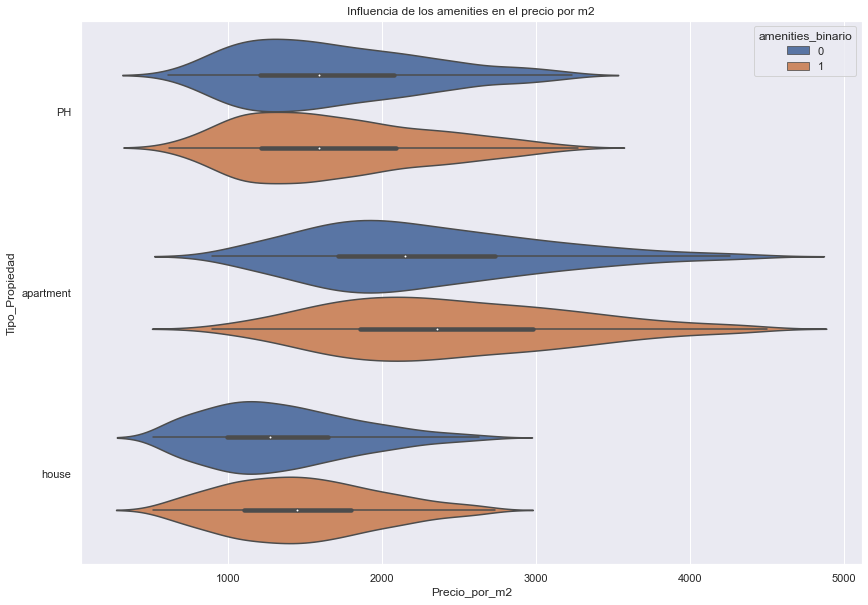

In [148]:
import warnings
warnings.filterwarnings("ignore")

data1 = data[data["Tipo_Propiedad"] != 'store']
data1['amenities_binario'] = data1["Amenities"] != 0 
data1['amenities_binario'] = data1['amenities_binario'].astype(np.int)
fig, axs = plt.subplots(figsize=(14, 10))
sns.violinplot("Precio_por_m2",
    "Tipo_Propiedad",
    hue="amenities_binario",
    data=data1,
    bw = 0.25)
axs.set_title('Influencia de los amenities en el precio por m2')

Exportamos el dataset de todo ARGENTINA para el análisis final

In [149]:
data.to_csv('./data/properati-fase2.csv', sep=',', index=False)

In [150]:
regiones = data.groupby('Región').Región.count()
regiones

Región
Bs.As. G.B.A. Zona Norte        20883
Bs.As. G.B.A. Zona Oeste         6887
Bs.As. G.B.A. Zona Sur           9320
Buenos Aires Costa Atlántica     7624
Buenos Aires Interior            1340
Capital Federal                 23937
Catamarca                          15
Chaco                              26
Chubut                            124
Corrientes                        422
Córdoba                          6002
Entre Ríos                         81
Formosa                             4
Jujuy                               3
La Pampa                           16
La Rioja                            1
Mendoza                           364
Misiones                          176
Neuquén                           235
Río Negro                         268
Salta                              63
San Juan                            4
San Luis                          142
Santa Cruz                          8
Santa Fe                         4526
Santiago Del Estero                 1
Tierr